In [1]:
!pip install -q git+https://github.com/tensorflow/docs

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


From the dataset, we see that the columns 'age', 'bmi' 'children' and 'expenses' are numerical columns while the columns 'sex', 'smoker' and 'region' are categorical columns. We will first try to encode the categorical columns to numerical columns. For this, we need to know what are the value counts of the respective columns.

In [4]:
dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [5]:
dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [6]:
dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

We set up dictionaries for each categorical column to change it to numerical column.

In [7]:
sex_dict = {'male': 0, 'female': 1}
smoker_dict = {'no': 0, 'yes': 1}
region_dict = {'northeast': 0, 'southeast': 1, 'southwest': 2, 'northwest': 3}

In [8]:
dataset['sex'] = dataset['sex'].map(sex_dict)
dataset['smoker'] = dataset['smoker'].map(smoker_dict)
dataset['region'] = dataset['region'].map(region_dict)

dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,2,16884.92
1,18,0,33.8,1,0,1,1725.55
2,28,0,33.0,3,0,1,4449.46
3,33,0,22.7,0,0,3,21984.47
4,32,0,28.9,0,0,3,3866.86


Now, we convert the dataset into training and testing datasets.

In [9]:
X = dataset[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = dataset['expenses']

In [10]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=101)
print(train_dataset.shape, test_dataset.shape)

(1070, 6) (268, 6)


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [12]:
train_dataset = scaler.fit_transform(train_dataset)
test_dataset = scaler.transform(test_dataset)

In [13]:
model = keras.models.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mae', metrics=['mae', 'mse'])

In [14]:
model.fit(x=train_dataset, y=train_labels, validation_split=0.2, batch_size=256, epochs=600)

Epoch 1/600
4/4 [==============================] - 1s 60ms/step - loss: 13439.1963 - mae: 13439.1963 - mse: 330050048.0000 - val_loss: 13153.3320 - val_mae: 13153.3320 - val_mse: 314402048.0000
Epoch 2/600
4/4 [==============================] - 0s 12ms/step - loss: 13439.0303 - mae: 13439.0303 - mse: 330044832.0000 - val_loss: 13153.1963 - val_mae: 13153.1963 - val_mse: 314397888.0000
Epoch 3/600
4/4 [==============================] - 0s 11ms/step - loss: 13438.8652 - mae: 13438.8652 - mse: 330039712.0000 - val_loss: 13153.0273 - val_mae: 13153.0273 - val_mse: 314392928.0000
Epoch 4/600
4/4 [==============================] - 0s 12ms/step - loss: 13438.6670 - mae: 13438.6670 - mse: 330034240.0000 - val_loss: 13152.7988 - val_mae: 13152.7988 - val_mse: 314386272.0000
Epoch 5/600
4/4 [==============================] - 0s 12ms/step - loss: 13438.4043 - mae: 13438.4043 - mse: 330026560.0000 - val_loss: 13152.4932 - val_mae: 13152.4932 - val_mse: 314377312.0000
Epoch 6/600
4/4 [=============

4/4 [==============================] - 0s 12ms/step - loss: 10213.7920 - mae: 10213.7920 - mse: 240640592.0000 - val_loss: 9757.2793 - val_mae: 9757.2793 - val_mse: 222663280.0000
Epoch 44/600
4/4 [==============================] - 0s 12ms/step - loss: 9943.7822 - mae: 9943.7822 - mse: 233772256.0000 - val_loss: 9451.7539 - val_mae: 9451.7539 - val_mse: 214294752.0000
Epoch 45/600
4/4 [==============================] - 0s 12ms/step - loss: 9634.2139 - mae: 9634.2148 - mse: 223600752.0000 - val_loss: 9141.9307 - val_mae: 9141.9307 - val_mse: 205734240.0000
Epoch 46/600
4/4 [==============================] - 0s 12ms/step - loss: 9276.6016 - mae: 9276.6016 - mse: 213182544.0000 - val_loss: 8859.2412 - val_mae: 8859.2412 - val_mse: 197082944.0000
Epoch 47/600
4/4 [==============================] - 0s 11ms/step - loss: 9070.4844 - mae: 9070.4844 - mse: 205557696.0000 - val_loss: 8623.3389 - val_mae: 8623.3389 - val_mse: 188496480.0000
Epoch 48/600
4/4 [==============================] - 0s 1

Epoch 86/600
4/4 [==============================] - 0s 12ms/step - loss: 6861.2891 - mae: 6861.2891 - mse: 115176952.0000 - val_loss: 6733.0200 - val_mae: 6733.0200 - val_mse: 106153368.0000
Epoch 87/600
4/4 [==============================] - 0s 11ms/step - loss: 6766.7241 - mae: 6766.7241 - mse: 113517568.0000 - val_loss: 6695.4043 - val_mae: 6695.4043 - val_mse: 105142776.0000
Epoch 88/600
4/4 [==============================] - 0s 12ms/step - loss: 6657.7568 - mae: 6657.7568 - mse: 112334928.0000 - val_loss: 6657.4473 - val_mae: 6657.4473 - val_mse: 104244352.0000
Epoch 89/600
4/4 [==============================] - 0s 11ms/step - loss: 6769.9189 - mae: 6769.9189 - mse: 113769808.0000 - val_loss: 6618.3047 - val_mae: 6618.3047 - val_mse: 103234312.0000
Epoch 90/600
4/4 [==============================] - 0s 11ms/step - loss: 6704.6094 - mae: 6704.6094 - mse: 112672872.0000 - val_loss: 6578.3877 - val_mae: 6578.3877 - val_mse: 102305848.0000
Epoch 91/600
4/4 [===========================

4/4 [==============================] - 0s 12ms/step - loss: 4733.1519 - mae: 4733.1519 - mse: 71394608.0000 - val_loss: 4188.6401 - val_mae: 4188.6401 - val_mse: 63256960.0000
Epoch 130/600
4/4 [==============================] - 0s 11ms/step - loss: 4798.8589 - mae: 4798.8589 - mse: 71625392.0000 - val_loss: 4134.6875 - val_mae: 4134.6875 - val_mse: 61802156.0000
Epoch 131/600
4/4 [==============================] - 0s 12ms/step - loss: 4645.2485 - mae: 4645.2485 - mse: 66576488.0000 - val_loss: 4086.9685 - val_mae: 4086.9685 - val_mse: 60606864.0000
Epoch 132/600
4/4 [==============================] - 0s 11ms/step - loss: 4602.7046 - mae: 4602.7046 - mse: 67191568.0000 - val_loss: 4039.8455 - val_mae: 4039.8455 - val_mse: 59383760.0000
Epoch 133/600
4/4 [==============================] - 0s 12ms/step - loss: 4521.8428 - mae: 4521.8428 - mse: 63552896.0000 - val_loss: 3998.4468 - val_mae: 3998.4468 - val_mse: 58393692.0000
Epoch 134/600
4/4 [==============================] - 0s 12ms/ste

4/4 [==============================] - 0s 12ms/step - loss: 4116.7896 - mae: 4116.7896 - mse: 51652952.0000 - val_loss: 3591.4075 - val_mae: 3591.4075 - val_mse: 46373036.0000
Epoch 173/600
4/4 [==============================] - 0s 12ms/step - loss: 3844.2517 - mae: 3844.2517 - mse: 45808348.0000 - val_loss: 3594.6208 - val_mae: 3594.6208 - val_mse: 45957088.0000
Epoch 174/600
4/4 [==============================] - 0s 12ms/step - loss: 4037.5935 - mae: 4037.5935 - mse: 49373544.0000 - val_loss: 3597.5994 - val_mae: 3597.5994 - val_mse: 45778168.0000
Epoch 175/600
4/4 [==============================] - 0s 12ms/step - loss: 3999.5769 - mae: 3999.5769 - mse: 48481224.0000 - val_loss: 3591.9631 - val_mae: 3591.9631 - val_mse: 45927176.0000
Epoch 176/600
4/4 [==============================] - 0s 12ms/step - loss: 4019.7666 - mae: 4019.7666 - mse: 48718852.0000 - val_loss: 3591.4321 - val_mae: 3591.4321 - val_mse: 46135096.0000
Epoch 177/600
4/4 [==============================] - 0s 12ms/ste

4/4 [==============================] - 0s 12ms/step - loss: 4134.9536 - mae: 4134.9536 - mse: 52377608.0000 - val_loss: 3619.9875 - val_mae: 3619.9875 - val_mse: 45119024.0000
Epoch 216/600
4/4 [==============================] - 0s 12ms/step - loss: 4054.5239 - mae: 4054.5239 - mse: 49891104.0000 - val_loss: 3606.5891 - val_mae: 3606.5891 - val_mse: 44955276.0000
Epoch 217/600
4/4 [==============================] - 0s 12ms/step - loss: 3883.3782 - mae: 3883.3782 - mse: 45362400.0000 - val_loss: 3594.7185 - val_mae: 3594.7185 - val_mse: 44762448.0000
Epoch 218/600
4/4 [==============================] - 0s 12ms/step - loss: 4023.0640 - mae: 4023.0640 - mse: 47674908.0000 - val_loss: 3590.5481 - val_mae: 3590.5481 - val_mse: 44642392.0000
Epoch 219/600
4/4 [==============================] - 0s 12ms/step - loss: 3919.7649 - mae: 3919.7649 - mse: 46223792.0000 - val_loss: 3589.6836 - val_mae: 3589.6836 - val_mse: 44615336.0000
Epoch 220/600
4/4 [==============================] - 0s 11ms/ste

4/4 [==============================] - 0s 13ms/step - loss: 3994.0161 - mae: 3994.0161 - mse: 47815188.0000 - val_loss: 3592.8606 - val_mae: 3592.8606 - val_mse: 44501792.0000
Epoch 259/600
4/4 [==============================] - 0s 12ms/step - loss: 4020.8201 - mae: 4020.8201 - mse: 48825212.0000 - val_loss: 3593.7722 - val_mae: 3593.7722 - val_mse: 44475660.0000
Epoch 260/600
4/4 [==============================] - 0s 12ms/step - loss: 3966.1458 - mae: 3966.1458 - mse: 46978248.0000 - val_loss: 3595.9014 - val_mae: 3595.9014 - val_mse: 44498856.0000
Epoch 261/600
4/4 [==============================] - 0s 12ms/step - loss: 4036.1411 - mae: 4036.1411 - mse: 48782748.0000 - val_loss: 3597.8633 - val_mae: 3597.8633 - val_mse: 44527908.0000
Epoch 262/600
4/4 [==============================] - 0s 12ms/step - loss: 4020.4941 - mae: 4020.4941 - mse: 48804040.0000 - val_loss: 3618.1794 - val_mae: 3618.1794 - val_mse: 44768884.0000
Epoch 263/600
4/4 [==============================] - 0s 12ms/ste

4/4 [==============================] - 0s 12ms/step - loss: 3931.4805 - mae: 3931.4805 - mse: 46469648.0000 - val_loss: 3586.5532 - val_mae: 3586.5532 - val_mse: 44584472.0000
Epoch 302/600
4/4 [==============================] - 0s 11ms/step - loss: 3809.6558 - mae: 3809.6558 - mse: 45106460.0000 - val_loss: 3585.5405 - val_mae: 3585.5405 - val_mse: 44542616.0000
Epoch 303/600
4/4 [==============================] - 0s 12ms/step - loss: 3806.9126 - mae: 3806.9126 - mse: 45095928.0000 - val_loss: 3587.1716 - val_mae: 3587.1716 - val_mse: 44553208.0000
Epoch 304/600
4/4 [==============================] - 0s 12ms/step - loss: 3987.2019 - mae: 3987.2019 - mse: 49296328.0000 - val_loss: 3592.3865 - val_mae: 3592.3865 - val_mse: 44593276.0000
Epoch 305/600
4/4 [==============================] - 0s 12ms/step - loss: 4080.5981 - mae: 4080.5981 - mse: 49545892.0000 - val_loss: 3601.8796 - val_mae: 3601.8796 - val_mse: 44662296.0000
Epoch 306/600
4/4 [==============================] - 0s 12ms/ste

4/4 [==============================] - 0s 11ms/step - loss: 4035.0918 - mae: 4035.0918 - mse: 47985200.0000 - val_loss: 3589.1587 - val_mae: 3589.1587 - val_mse: 44388264.0000
Epoch 345/600
4/4 [==============================] - 0s 12ms/step - loss: 3969.2185 - mae: 3969.2185 - mse: 48623584.0000 - val_loss: 3602.2471 - val_mae: 3602.2471 - val_mse: 44532848.0000
Epoch 346/600
4/4 [==============================] - 0s 12ms/step - loss: 3974.2661 - mae: 3974.2664 - mse: 47390776.0000 - val_loss: 3611.7227 - val_mae: 3611.7227 - val_mse: 44608956.0000
Epoch 347/600
4/4 [==============================] - 0s 15ms/step - loss: 4049.1379 - mae: 4049.1379 - mse: 50848916.0000 - val_loss: 3615.7380 - val_mae: 3615.7380 - val_mse: 44633428.0000
Epoch 348/600
4/4 [==============================] - 0s 15ms/step - loss: 4015.5793 - mae: 4015.5793 - mse: 49451712.0000 - val_loss: 3596.6086 - val_mae: 3596.6086 - val_mse: 44471732.0000
Epoch 349/600
4/4 [==============================] - 0s 12ms/ste

4/4 [==============================] - 0s 11ms/step - loss: 4027.4626 - mae: 4027.4626 - mse: 49171096.0000 - val_loss: 3587.1409 - val_mae: 3587.1409 - val_mse: 44361288.0000
Epoch 388/600
4/4 [==============================] - 0s 11ms/step - loss: 3878.5520 - mae: 3878.5520 - mse: 46446992.0000 - val_loss: 3587.5979 - val_mae: 3587.5979 - val_mse: 44340128.0000
Epoch 389/600
4/4 [==============================] - 0s 11ms/step - loss: 4050.8523 - mae: 4050.8523 - mse: 50137616.0000 - val_loss: 3581.4143 - val_mae: 3581.4143 - val_mse: 44227832.0000
Epoch 390/600
4/4 [==============================] - 0s 11ms/step - loss: 3966.0115 - mae: 3966.0115 - mse: 47659900.0000 - val_loss: 3580.7312 - val_mae: 3580.7312 - val_mse: 44183568.0000
Epoch 391/600
4/4 [==============================] - 0s 12ms/step - loss: 4082.7817 - mae: 4082.7817 - mse: 50256108.0000 - val_loss: 3582.2212 - val_mae: 3582.2212 - val_mse: 44194116.0000
Epoch 392/600
4/4 [==============================] - 0s 12ms/ste

4/4 [==============================] - 0s 12ms/step - loss: 3922.3557 - mae: 3922.3557 - mse: 46940532.0000 - val_loss: 3572.5452 - val_mae: 3572.5452 - val_mse: 44183280.0000
Epoch 431/600
4/4 [==============================] - 0s 12ms/step - loss: 4048.9861 - mae: 4048.9861 - mse: 50574752.0000 - val_loss: 3571.2937 - val_mae: 3571.2937 - val_mse: 44178220.0000
Epoch 432/600
4/4 [==============================] - 0s 12ms/step - loss: 4002.3704 - mae: 4002.3704 - mse: 48908136.0000 - val_loss: 3567.3911 - val_mae: 3567.3911 - val_mse: 44135060.0000
Epoch 433/600
4/4 [==============================] - 0s 12ms/step - loss: 4115.8071 - mae: 4115.8071 - mse: 51657268.0000 - val_loss: 3565.8333 - val_mae: 3565.8333 - val_mse: 44100340.0000
Epoch 434/600
4/4 [==============================] - 0s 11ms/step - loss: 4006.9377 - mae: 4006.9377 - mse: 48389284.0000 - val_loss: 3565.8125 - val_mae: 3565.8125 - val_mse: 44122740.0000
Epoch 435/600
4/4 [==============================] - 0s 12ms/ste

4/4 [==============================] - 0s 12ms/step - loss: 3773.5984 - mae: 3773.5984 - mse: 45366024.0000 - val_loss: 3551.6943 - val_mae: 3551.6943 - val_mse: 43722444.0000
Epoch 474/600
4/4 [==============================] - 0s 11ms/step - loss: 3955.8052 - mae: 3955.8049 - mse: 45037468.0000 - val_loss: 3551.0278 - val_mae: 3551.0278 - val_mse: 43733232.0000
Epoch 475/600
4/4 [==============================] - 0s 12ms/step - loss: 3943.1426 - mae: 3943.1426 - mse: 47334252.0000 - val_loss: 3551.0181 - val_mae: 3551.0181 - val_mse: 43784952.0000
Epoch 476/600
4/4 [==============================] - 0s 12ms/step - loss: 3988.5486 - mae: 3988.5486 - mse: 48468940.0000 - val_loss: 3551.5300 - val_mae: 3551.5300 - val_mse: 43838124.0000
Epoch 477/600
4/4 [==============================] - 0s 12ms/step - loss: 3929.2917 - mae: 3929.2917 - mse: 47501612.0000 - val_loss: 3559.8625 - val_mae: 3559.8625 - val_mse: 43977680.0000
Epoch 478/600
4/4 [==============================] - 0s 11ms/ste

4/4 [==============================] - 0s 12ms/step - loss: 3930.2659 - mae: 3930.2659 - mse: 47527832.0000 - val_loss: 3545.3413 - val_mae: 3545.3413 - val_mse: 43686860.0000
Epoch 517/600
4/4 [==============================] - 0s 12ms/step - loss: 3959.1172 - mae: 3959.1172 - mse: 48084000.0000 - val_loss: 3549.2751 - val_mae: 3549.2751 - val_mse: 43732700.0000
Epoch 518/600
4/4 [==============================] - 0s 12ms/step - loss: 3842.0908 - mae: 3842.0908 - mse: 46216128.0000 - val_loss: 3552.4714 - val_mae: 3552.4714 - val_mse: 43745312.0000
Epoch 519/600
4/4 [==============================] - 0s 12ms/step - loss: 3783.9866 - mae: 3783.9866 - mse: 44250780.0000 - val_loss: 3563.6042 - val_mae: 3563.6042 - val_mse: 43826916.0000
Epoch 520/600
4/4 [==============================] - 0s 11ms/step - loss: 3895.1624 - mae: 3895.1624 - mse: 47499528.0000 - val_loss: 3567.1289 - val_mae: 3567.1289 - val_mse: 43839852.0000
Epoch 521/600
4/4 [==============================] - 0s 12ms/ste

4/4 [==============================] - 0s 12ms/step - loss: 3861.1372 - mae: 3861.1372 - mse: 45185780.0000 - val_loss: 3534.3982 - val_mae: 3534.3982 - val_mse: 43508632.0000
Epoch 560/600
4/4 [==============================] - 0s 12ms/step - loss: 3985.4629 - mae: 3985.4629 - mse: 48297420.0000 - val_loss: 3536.3157 - val_mae: 3536.3157 - val_mse: 43526708.0000
Epoch 561/600
4/4 [==============================] - 0s 11ms/step - loss: 3745.6355 - mae: 3745.6355 - mse: 43946676.0000 - val_loss: 3531.4717 - val_mae: 3531.4717 - val_mse: 43404168.0000
Epoch 562/600
4/4 [==============================] - 0s 12ms/step - loss: 3750.1274 - mae: 3750.1274 - mse: 43938720.0000 - val_loss: 3524.7334 - val_mae: 3524.7334 - val_mse: 43190492.0000
Epoch 563/600
4/4 [==============================] - 0s 12ms/step - loss: 3867.9221 - mae: 3867.9221 - mse: 46283612.0000 - val_loss: 3523.2659 - val_mae: 3523.2659 - val_mse: 43075428.0000
Epoch 564/600
4/4 [==============================] - 0s 12ms/ste

9/9 - 0s - loss: 2974.4260 - mae: 2974.4260 - mse: 32322074.0000 - 28ms/epoch - 3ms/step
Testing set Mean Abs Error: 2974.43 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 1ms/step


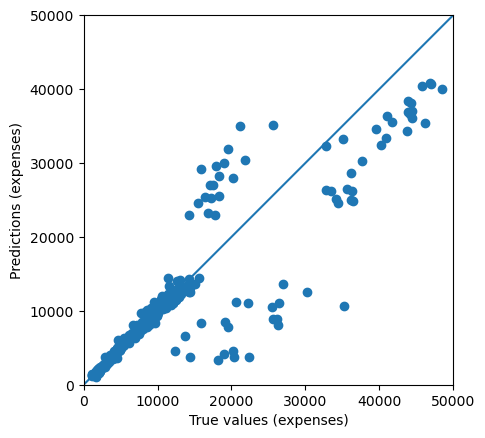

In [15]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
